<a href="https://colab.research.google.com/github/javajerry/Algorithm-Trading/blob/main/LTSM_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artifical recurrent neural network called Long Short Term Memory(LSTM) 
#              to predict the closing stock proce of a corporation(applie Inc.) using the past 60 days stock price.


In [2]:
#import the library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quoote
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2020-12-24')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.065252
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.849854
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.380503
2013-01-07,18.903572,18.400000,18.642857,18.710714,484156400.0,16.284145
2013-01-08,18.996071,18.616072,18.900356,18.761072,458707200.0,16.327978
...,...,...,...,...,...,...
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005


In [4]:
# Get the number of rows and columns in the data set
df.shape

(2011, 6)

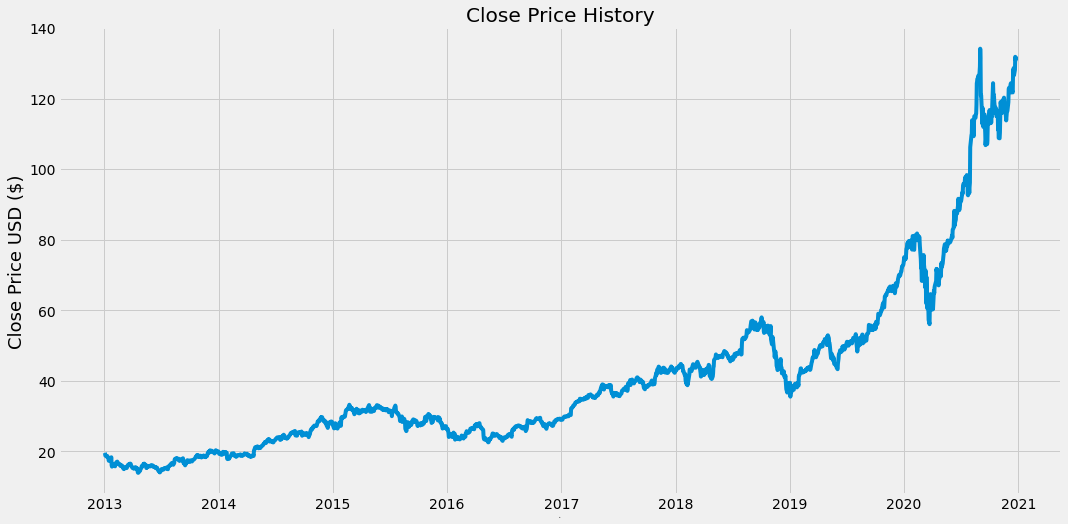

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=1)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [6]:
#Create a new daataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1609

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.9808705 ],
       [0.97321867],
       [0.98161902]])

In [10]:
#Create the trainng data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.04708139, 0.04502289, 0.04053753, 0.0396167 , 0.04003553,
       0.0375968 , 0.03950084, 0.03854735, 0.03303719, 0.02833499,
       0.03432634, 0.03331344, 0.03251736, 0.03393425, 0.03667894,
       0.01781369, 0.0146591 , 0.01761468, 0.02012172, 0.01969399,
       0.01929595, 0.01874047, 0.01538388, 0.019994  , 0.01984845,
       0.02307731, 0.02508533, 0.0265557 , 0.02298226, 0.02271789,
       0.02259313, 0.02068314, 0.02063265, 0.01732358, 0.01649483,
       0.01790578, 0.01552646, 0.01735923, 0.01605223, 0.01511061,
       0.01186392, 0.00876872, 0.01206293, 0.01043514, 0.01189659,
       0.01223522, 0.01406204, 0.01125795, 0.01123418, 0.01246691,
       0.01578192, 0.01936427, 0.0189989 , 0.01828302, 0.0184761 ,
       0.02120297, 0.02169903, 0.02097424, 0.01828302, 0.01548488])]
[0.011400530420072968]



In [12]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape the data
print('before', x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('after', x_train.shape)


before (1549, 60)
after (1549, 60, 1)


In [19]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [21]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1549/1549 [==============================] - 38s 23ms/step - loss: 0.0012


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1549 to 2009
